In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_rows = 20 #limit maxmum low 20

%matplotlib inline
sns.set(style = 'whitegrid', palette = "colorblind", font_scale = 1)

In [13]:
orders = pd.read_csv("orders.csv") #order원본데이터
priors = pd.read_csv("order_products__prior.csv") #products_prior데이터
products = pd.read_csv("products.csv") #product

order_product_cnt_ds = priors.groupby('order_id').count()[['product_id']]
#order_prior(이전주문)에서 아이디별로 몇개 구입했는지
order_product_cnt_ds.columns = [ 'product_cnt'] # order_product_cnt_ds의 column이름 바꿈
sample_submission = pd.read_csv("sample_submission.csv")

In [14]:
order_ds = orders.merge(order_product_cnt_ds, 
                              left_on='order_id', right_index=True)
#order파일에 order_product_개수를 orderID기준으로 붙임

In [15]:
# 1. order + 주문 1개당 담은 상품 개수
order_ds.tail(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_cnt
3421061,167903,206208,prior,43,4,14,3.0,14
3421062,2393201,206208,prior,44,6,16,2.0,10
3421063,3292671,206208,prior,45,2,11,3.0,18
3421064,3059777,206208,prior,46,1,10,13.0,7
3421065,2239861,206208,prior,47,3,4,9.0,23
3421066,1285346,206208,prior,48,1,11,5.0,8
3421067,1882108,206208,prior,49,1,22,7.0,17
3421069,3154581,206209,prior,1,3,11,NaN,13
3421070,1889163,206209,prior,2,3,17,7.0,9
3421071,1542354,206209,prior,3,5,11,30.0,15


In [16]:
# 2. prior 이전 주문
products.tail(20)

,product_id,product_name,aisle_id,department_id
49668,49669,K Cup Dark Blend,100,21
49669,49670,Beef Summer Sausage,106,12
49670,49671,Milk Chocolate Drops,45,19
49671,49672,Cafe Mocha K-Cup Packs,26,7
49672,49673,Stone Baked Multi Grain Artisan Rolls,129,1
49673,49674,Frozen Greek Yogurt Bars Chocolate Chip,37,1
49674,49675,Cinnamon Dolce Keurig Brewed K Cups,26,7
49675,49676,Ultra Red Energy Drink,64,7
49676,49677,Thick & Chunky Sloppy Joe Sauce,59,15
49677,49678,Large Chicken & Cheese Taquitos,129,1


In [17]:
train = pd.read_csv("order_products__train.csv")

In [18]:
# 3. 가장 직전 주문
train.tail(20)

,order_id,product_id,add_to_cart_order,reordered
1384597,3421056,5750,1,1
1384598,3421056,9340,2,1
1384599,3421056,21709,3,1
1384600,3421056,16475,4,0
1384601,3421056,12432,5,0
1384602,3421058,15629,1,1
1384603,3421058,4347,2,1
1384604,3421058,34466,3,1
1384605,3421058,6244,4,1
1384606,3421058,6858,5,1


# 1) Dataset Summary

In [19]:
total_user = len(order_ds.user_id.unique()) # 총 사용자수
total_order = len(order_ds) # 총 주문 개수
total_ordered_product = len(products) # 제품 주문 개수
unique_products = len(products.product_id.unique()) # 제품 개수

print ("total user = {}".format(total_user))
print ("total order = {} ({} orders per a user)".\
       format(total_order,total_order/total_user))

print ("total product = {}".format(unique_products))
print ("total ordered product = {} ({} orders per a product)".\
       format(total_ordered_product, 
              total_ordered_product/unique_products))
       

total user = 206209
total order = 3214874 (15.590367054784224 orders per a user)
total product = 49688
total ordered product = 49688 (1.0 orders per a product)


## Weekly-Hour Analysis
<br>
### Week-Hour order count heatmap

상품구매가 요일별/ 시간별(weekhour)특징이 있을 것으로 보고, 분석하고자 함

In [20]:
index2day = "Sun Mon Tue Wed Thu Fri Sat".split()

In [21]:
from matplotlib import font_manager, rc

def drawWeekHour(ds, values,  aggfunc=len, title=None, figsize=(18,5) , cmap=None):
    weekhour_ds = ds.pivot_table(index='order_dow', columns='order_hour_of_day', values=values, aggfunc=aggfunc).fillna(0)
    weekhour_ds.index =  [  index2day[index] for index in weekhour_ds.index]
    #pivot multi index테이블 생성
    #여기서 인덱스는 요일, coulumn은 주문시간
    
    font_name = font_manager.FontProperties(fname="c:\\Windows\\Fonts\\NanumGothic.ttf").get_name()
    sns.set(style="whitegrid", palette="colorblind", font_scale=1, rc=rc('font', family=font_name) )

    plt.figure(figsize=figsize)
    f = sns.heatmap(weekhour_ds, annot=True, fmt="1.2f", linewidths=.5, cmap=cmap) 
    plt.xlabel("Hour")
    plt.ylabel("Day of Week")
    if title:
        plt.title(title, fontsize=15)

### Weekly-hour heatmap:Orders Heatmap

* 일요일 / 월요일 9H ~ 16H까지 주문(order)가 많은 특징

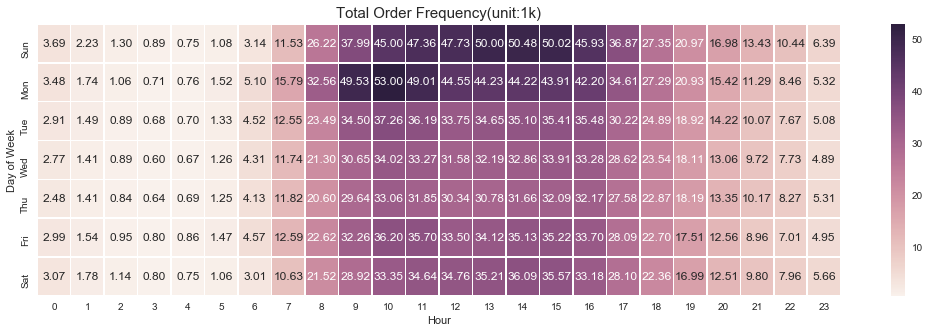

In [22]:
drawWeekHour(order_ds, values = 'order_id', title= 'Total Order Frequency(unit:1k)', 
            aggfunc = lambda x:len(x)/1000)

### Q1. 주문하는 고객이 많은 것일까, 고객당 주문 건수가 많은 것인가
<br>
* 고유 고객수를 heatmap으로 살펴보자
* 주문heatmap과 비슷

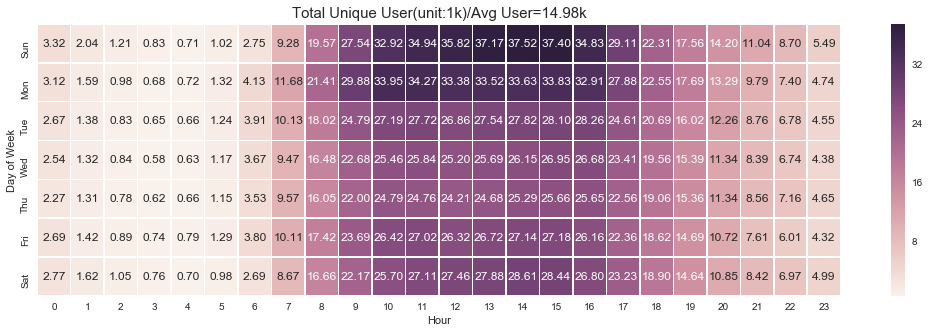

In [23]:
avg_users = round(order_ds.groupby(['order_dow', 'order_hour_of_day']).\
                  agg({"user_id":lambda x:len(x.unique())/1000}).mean().values[0],2)

#order데이터에 대해서 요일과 주문시간으로 묶고, 

drawWeekHour(order_ds, values = 'user_id', title = "Total Unique User(unit:1k)/Avg User={}k".format(avg_users), 
             aggfunc = lambda x:len(x.unique())/1000)

* 그럼 이제 고객당 주문 건수를 보자

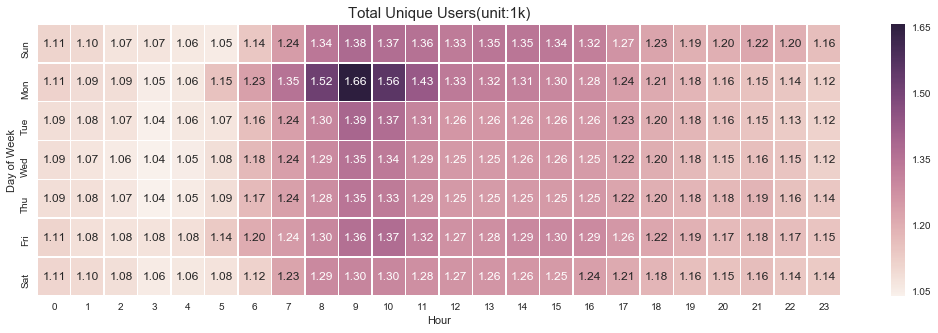

In [24]:
#userid에서 unique를 나누면서 중복을 확인 할 수 있다
drawWeekHour(order_ds, values = 'user_id', title = 'Total Unique Users(unit:1k)', 
            aggfunc = lambda x : len(x)/len(x.unique()))

### A1) 주문하는 고객이 많기 때문이다
<br>
* 그럼 월요일 오전 9시에는 어떤 물건을 살까? 혹시 특이하게 많이 사는 것이 있을까?

In [25]:
#order_prior에다가 order를 order_id기준으로 합한다
merge_order_product_sample =priors.merge(orders, on = 'order_id', how='inner' )

In [26]:
#그 dataset에다가 product dataset을 product_id기준으로 합한다. 
merge_order_product_sample = merge_order_product_sample.merge(products, on='product_id' )

In [27]:
merge_order_product_sample.head(10) # (order_prior + order )sample + product

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,26,33120,5,0,153404,prior,2,0,16,7.0,Organic Egg Whites,86,16
2,120,33120,13,0,23750,prior,11,6,8,10.0,Organic Egg Whites,86,16
3,327,33120,5,1,58707,prior,21,6,9,8.0,Organic Egg Whites,86,16
4,390,33120,28,1,166654,prior,48,0,12,9.0,Organic Egg Whites,86,16
5,537,33120,2,1,180135,prior,15,2,8,3.0,Organic Egg Whites,86,16
6,582,33120,7,1,193223,prior,6,2,19,10.0,Organic Egg Whites,86,16
7,608,33120,5,1,91030,prior,11,3,21,12.0,Organic Egg Whites,86,16
8,623,33120,1,1,37804,prior,63,3,12,3.0,Organic Egg Whites,86,16
9,689,33120,4,1,108932,prior,16,1,13,3.0,Organic Egg Whites,86,16


In [28]:
hour_9_order_product_ds = merge_order_product_sample[merge_order_product_sample.order_hour_of_day ==9]
grouped = hour_9_order_product_ds[:].groupby(['order_dow']) #요일별로 묶음
grouped.tail(5)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
32433719,1993767,31133,12,0,183963,prior,2,2,9,13.0,Whole Grain Lasagna Pasta,59,15
32433727,2195378,10392,5,0,111578,prior,26,3,9,1.0,"Burdock Root, 475 mg, Capsules",47,11
32433768,1805634,22645,1,0,130867,prior,2,4,9,14.0,PM Headache Pain Reliever Caplets,133,11
32433777,2144938,13013,13,0,3468,prior,2,2,9,30.0,Lemon Herb Tahini Dip & Dressing,51,13
32433798,1821484,44884,18,0,313,prior,62,2,9,4.0,Raw Reserve Green Superfood,47,11
32433874,2181563,28049,2,0,40472,prior,6,2,9,8.0,Repair & Protect Pantene Pro-V Repair and Prot...,22,11
32433933,1921432,14607,6,0,153349,prior,12,5,9,16.0,Organic Lowfat Strawberry Yogurt Kefir,120,16
32433958,2280200,49162,2,0,71369,prior,2,1,9,6.0,Gold Temptation Refreshing Shower Gel,127,11
32433966,3369576,11928,3,0,185582,prior,3,3,9,8.0,SmartBlend Small Bites Beef & Rice Formula Adu...,40,8
32433977,2992511,46644,6,0,100471,prior,10,5,9,18.0,Romano Cheese,2,16


In [29]:
topn = 5

hour_9_popular_product = [] #9시에 인기있는 품목
for (dow, rows) in grouped:
    sub_ds = rows.groupby('product_id', as_index=False).agg({'order_id':len}).\
    sort_values('order_id', ascending =False)[:topn]
    sub_ds['dow'] = dow #요일
    sub_ds['rank'] = list(range(0, topn)) #순위를 매긴다
    hour_9_popular_product.append(sub_ds) # 요일별로 topn의 순위권에 있는 데이터를 리스트에 추가한다
    
hour_9_popular_product_ds = pd.concat(hour_9_popular_product).sort_values(['rank','dow']).merge(products, on='product_id')\
.pivot(index='dow', columns = 'rank', values='product_name')

hour_9_popular_product_ds.index = index2day


In [30]:
hour_9_popular_product_ds

rank,0,1,2,3,4
Sun,Banana,Bag of Organic Bananas,Organic Baby Spinach,Organic Strawberries,Organic Hass Avocado
Mon,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado
Tue,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado
Wed,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado
Thu,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado
Fri,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado
Sat,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado


### 9시보다 16시가 더 주문 비율이 높으므로 16시에 많이 팔린 상품 Top5를 확인 해 보자

In [31]:
hour_16_order_product_ds = merge_order_product_sample[merge_order_product_sample.order_hour_of_day ==16]
grouped = hour_16_order_product_ds[:].groupby(['order_dow']) #요일별로 묶음
grouped.tail(5)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
32433645,1721427,6320,23,0,140374,prior,1,3,16,NaN,Spinach Cheese Rice Palak Paneer Dinner,38,1
32433793,1877412,8249,16,0,55751,prior,16,4,16,4.0,Ultimate Omega Liquid,47,11
32433893,2059574,28651,6,0,103763,prior,20,4,16,3.0,Corn Flake Crumbs,5,13
32433914,3071872,45904,7,1,165534,prior,20,0,16,5.0,Vitamin Code 50 & Wiser Women's Multivitamin,47,11
32434070,3063155,15711,9,0,54740,prior,1,5,16,NaN,Sweet Bread 'N Butter Chips Pickles,110,13
32434094,2020254,2711,10,0,19489,prior,3,4,16,6.0,Tomato Basil Gouda,21,16
32434099,2999129,14178,10,0,40304,prior,2,3,16,12.0,"Sparkle Gel, Red",97,13
32434141,3304224,9289,14,1,202303,prior,6,0,16,3.0,Yuca/Cassava,129,1
32434174,3394940,20371,5,0,106846,prior,3,6,16,6.0,Cleaner Multisurface Made with Vinegar,100,21
32434195,3231959,29563,4,0,167703,prior,20,3,16,1.0,Icing Orange,97,13


In [32]:
topn = 5

hour_16_popular_product = [] #9시에 인기있는 품목
for (dow, rows) in grouped:
    sub_ds = rows.groupby('product_id', as_index=False).agg({'order_id':len}).\
    sort_values('order_id', ascending =False)[:topn]
    sub_ds['dow'] = dow # 요일
    sub_ds['rank'] = list(range(0, topn)) #순위를 매긴다
    hour_16_popular_product.append(sub_ds) # 요일별로 topn의 순위권에 있는 데이터를 리스트에 추가한다
    

hour_16_popular_product_ds = pd.concat(hour_16_popular_product).sort_values(['rank','dow']).merge(products, on='product_id')\
.pivot(index='dow', columns = 'rank', values='product_name')

hour_16_popular_product_ds.index = index2day


In [33]:
hour_16_popular_product_ds

rank,0,1,2,3,4
Sun,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado
Mon,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado
Tue,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado
Wed,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado
Thu,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado
Fri,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado
Sat,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado


## 잘 팔리는 상품
<br>
### Bestseller 20 product

In [34]:
def topItemEachGroup(ds, group_name, sort_name, topn):
    concat_list=[]
    for (key, rows) in ds.groupby(group_name):
        sub_ds = rows.sort_values(sort_name, ascending=False)[:topn] # 1위부터 주어진 순위까지 내림차순
        sub_ds['rank'] = list(range(1, topn+1)) # rank라는 column을 할당
        concat_list.append(sub_ds) # 합한 리스트에 추가하는 중
        
    return pd.concat(concat_list)

In [35]:
def drawRankTrend(pivot_ds, ylabel = 'Rank'):
    sns.set(style ="whitegrid", palette='colorblind', font_scale=1.3) #style setting
    index_max = pivot_ds.index.max()
    rank_max = pivot_ds.max().max()
    
    pivot_ds = pivot_ds.applymap(lambda x: rank_max-x+1)#?
    pivot_ds.plot(marker='o', figsize = (16,12), cmap = 'Dark2', xticks = pivot_ds.index, legend = None)
    
    plt.yticks(np.arange(rank_max, 0, -1), np.arange(1, rank_max+1))
    
    for name, rank in pivot_ds.loc[index_max].sort_values(ascending=False).dropna().iteritems():
        plt.text(index_max * 1.01, rank, name)
        
    plt.ylabel(ylabel)
    plt.show()

### Bestselller 20 product : 시간별 경향

In [36]:
hour_product_ds = merge_order_product_sample.groupby(['product_name', 'order_hour_of_day'], as_index = False).agg({'order_id':len})
hour_top_product_ds = topItemEachGroup(hour_product_ds, 'order_hour_of_day', 'order_id', 20)

hour_top_product_pivot_ds = hour_top_product_ds.pivot(index='order_hour_of_day', columns = 'product_name', values = 'rank')
hour_top_product_pivot_ds.head()

product_name,Apple Honeycrisp Organic,Bag of Organic Bananas,Banana,Carrots,Cucumber Kirby,Half & Half,Honeycrisp Apple,Large Lemon,Limes,Organic Avocado,...,Organic Raspberries,Organic Red Onion,Organic Strawberries,Organic Whole Milk,Organic Yellow Onion,Organic Zucchini,Seedless Red Grapes,Sparkling Water Grapefruit,Spring Water,Strawberries
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0,NaN,2.0,1.0,NaN,15.0,NaN,NaN,7.0,8.0,6.0,...,11.0,NaN,3.0,10.0,16.0,14.0,19.0,NaN,NaN,9.0
1,NaN,2.0,1.0,NaN,14.0,NaN,NaN,7.0,8.0,6.0,...,10.0,20.0,4.0,11.0,13.0,15.0,18.0,NaN,NaN,9.0
2,NaN,2.0,1.0,NaN,17.0,NaN,NaN,7.0,9.0,6.0,...,10.0,19.0,4.0,12.0,16.0,15.0,NaN,NaN,NaN,8.0
3,NaN,2.0,1.0,19.0,14.0,NaN,NaN,7.0,8.0,6.0,...,11.0,NaN,4.0,17.0,16.0,12.0,NaN,NaN,18.0,9.0
4,NaN,2.0,1.0,NaN,12.0,NaN,NaN,6.0,9.0,7.0,...,10.0,NaN,3.0,14.0,15.0,13.0,20.0,NaN,NaN,8.0


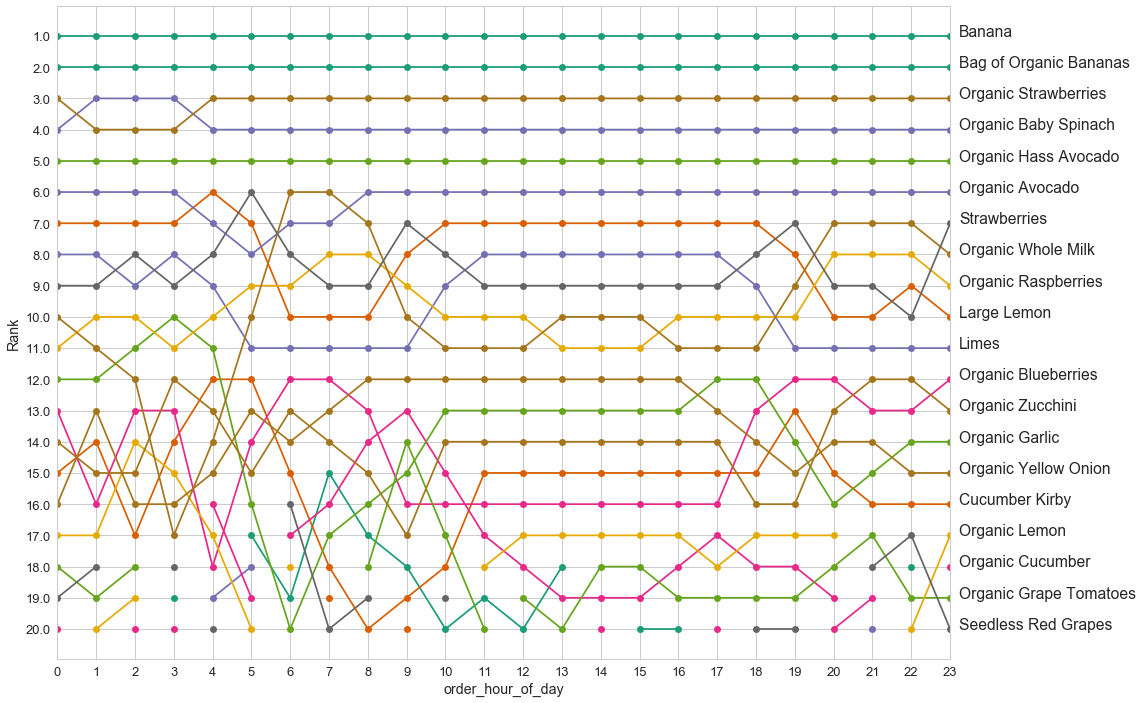

In [37]:
drawRankTrend(hour_top_product_pivot_ds)

### Bestseller 20 product : 요일별 경향

In [38]:
rank_ds = merge_order_product_sample.groupby(['product_name', 'order_dow'], as_index = False).agg({'order_id':len})
# sample에서 제품이름과, 구매 요일으로 그룹 -> order_id의 개수로 파악

rank_ds = topItemEachGroup(rank_ds, 'order_dow', 'order_id', 20) # 상위20
rank_pivot_ds = rank_ds.pivot(index = 'order_dow', columns='product_name', values='rank') #변수는 상품이름 / 인덱스는 요일
rank_pivot_ds.head()

product_name,Apple Honeycrisp Organic,Bag of Organic Bananas,Banana,Cucumber Kirby,Large Lemon,Limes,Organic Avocado,Organic Baby Spinach,Organic Blueberries,Organic Fuji Apple,...,Organic Hass Avocado,Organic Lemon,Organic Raspberries,Organic Strawberries,Organic Whole Milk,Organic Yellow Onion,Organic Zucchini,Seedless Red Grapes,Strawberries,Yellow Onions
order_dow,,,,,,,,,,,,,,,,,,,,,
0,20.0,2.0,1.0,15.0,7.0,8.0,6.0,3.0,17.0,NaN,...,5.0,18.0,10.0,4.0,11.0,12.0,14.0,NaN,9.0,19.0
1,18.0,2.0,1.0,16.0,7.0,11.0,6.0,4.0,17.0,15.0,...,5.0,19.0,9.0,3.0,10.0,12.0,13.0,NaN,8.0,NaN
2,20.0,2.0,1.0,17.0,7.0,11.0,6.0,4.0,15.0,16.0,...,5.0,18.0,10.0,3.0,9.0,12.0,14.0,NaN,8.0,NaN
3,19.0,2.0,1.0,16.0,10.0,11.0,6.0,4.0,13.0,17.0,...,5.0,18.0,9.0,3.0,8.0,12.0,15.0,NaN,7.0,NaN
4,NaN,2.0,1.0,16.0,9.0,11.0,6.0,4.0,12.0,18.0,...,5.0,20.0,10.0,3.0,8.0,13.0,15.0,17.0,7.0,NaN


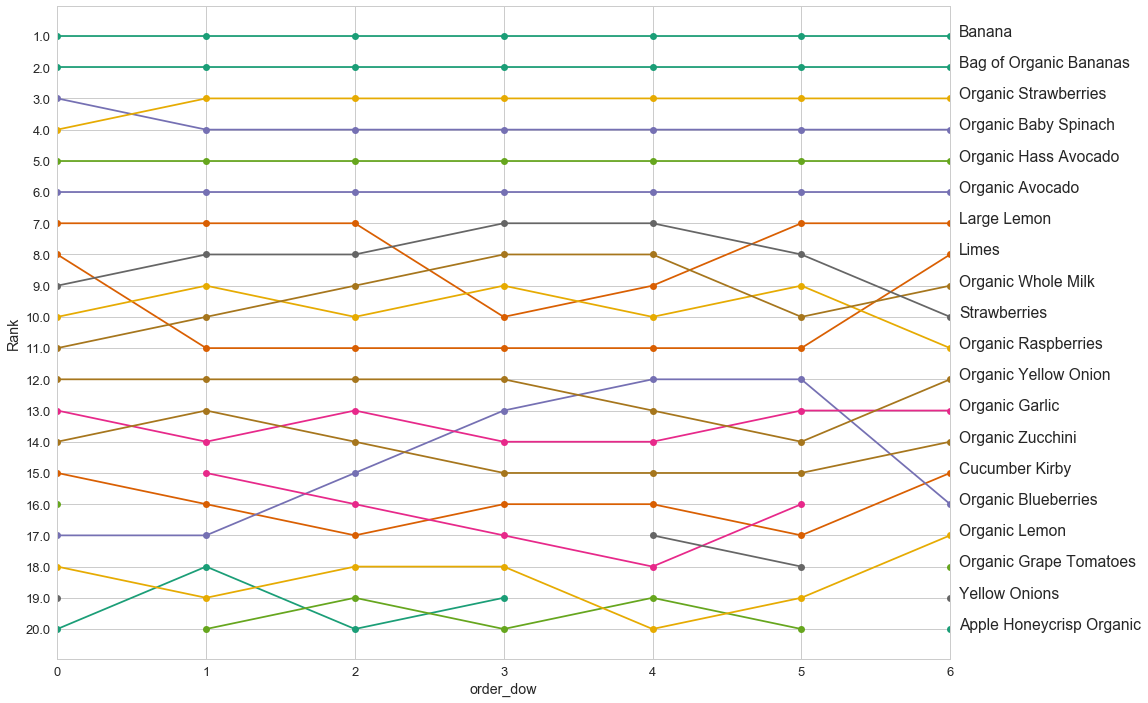

In [39]:
drawRankTrend(rank_pivot_ds)

## Q2) 한번의 주문(cart)에 상품을 많이 담아 구매하는 요일 / 시간은?


* weekday-hour : Product cnt per a order
* 주말(토/일) order 그리고 밤(21~23)늦은 주문 시 한번에 상품주문 개수가 많음
> 시간적 여유가 많을 때 상품 주문량이 많은 듯함 <br>
> 쇼핑 여유가 있을 때와 없을 때와의 다른 상품 패턴이 있을까?


In [40]:
order_ds.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_cnt
0,2539329,1,prior,1,2,8,NaN,5
1,2398795,1,prior,2,3,7,15.0,6
2,473747,1,prior,3,3,12,21.0,5
3,2254736,1,prior,4,4,7,29.0,5
4,431534,1,prior,5,4,15,28.0,8


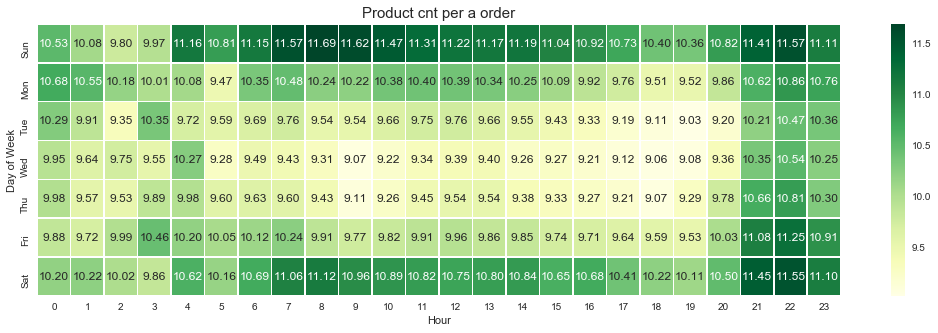

In [41]:
drawWeekHour(order_ds, values='product_cnt', title = 'Product cnt per a order',
             aggfunc = lambda x:np.mean(x), cmap = 'YlGn')

### 얼마나 자주 주문하는가? (다시 주문하기 까지 걸리는 평균 일수)
<br>
* 수치가 작을수록 주문과 주문까지의 경과되는 텀 일수가 작음 (그래서 자주 주문한다고 볼 수 있음)
* 주말과 새벽이 재 주문까지 걸리는 시간이 김
* 새벽의 주문텀이 긴 이유는 새벽에 깨어있을 확률이 적어서?
* 아니면 그 시간대에 주문한 상품 량이 많아서 좀 더 띄엄띄엄 사나?

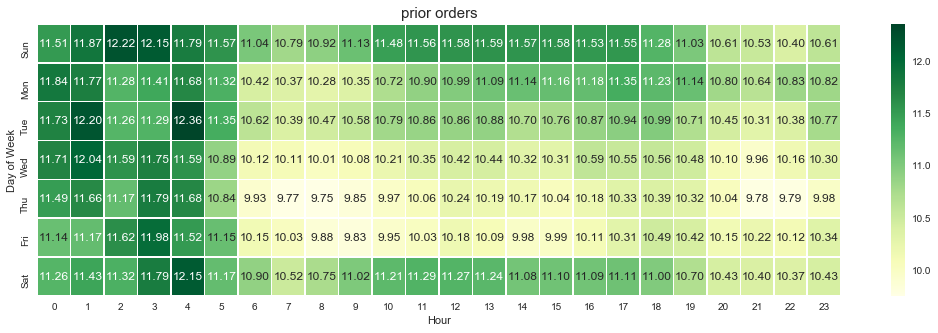

In [42]:
drawWeekHour(order_ds, values='days_since_prior_order', title = "prior orders",
            aggfunc=lambda x:np.mean(x), cmap = 'YlGn')

## Reoder Analysis

### Q3.주문 횟수가 많아 질수록 재주문까지 걸리는 기간이 짧아질까? 
<br>
* 유저별 주문 순번과 재 주문 경과된 시간관계는? (days_since_prior_order)?
<p> 주문 횟수가 많다는 것은 충성고객일듯하고, 그래서 재주문 경과 일수가 짧은 것으로 추측됨
* 유저당 주문이 많을수록 주문당 상품 구매수가 많을까?


In [43]:
print ("Avg days_since_prior_order {} Days". format(round(order_ds.days_since_prior_order.mean(), 2)))

Avg days_since_prior_order 10.71 Days


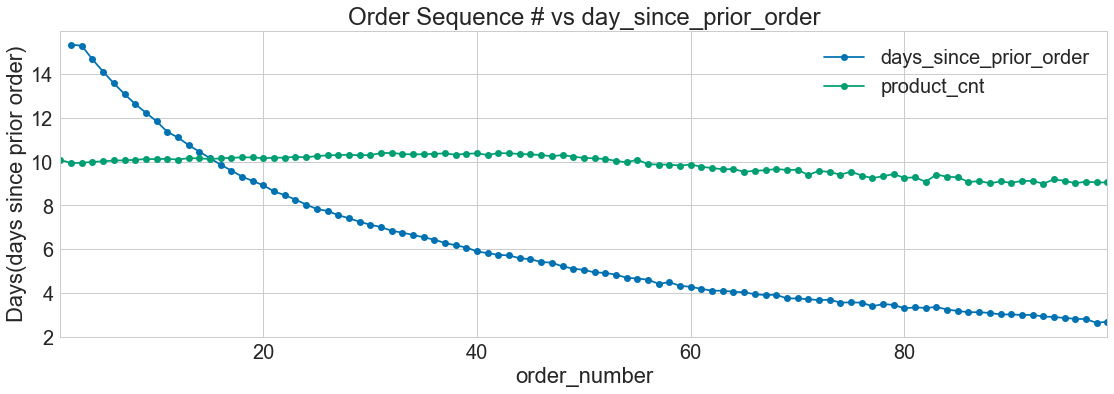

In [44]:
sns.set(style = 'whitegrid', palette = 'colorblind', font_scale = 2)
d_frame = order_ds.groupby('order_number').agg({'days_since_prior_order':np.mean, 'product_cnt':np.mean})
d_frame.head()
order_ds.groupby('order_number').agg({'days_since_prior_order':np.mean, 'product_cnt':np.mean})\
.plot(figsize=(16, 6), title='Order Sequence # vs day_since_prior_order', marker='o')

plt.ylabel("Days(days since prior order)")
plt.tight_layout()
plt.show()

In [45]:
d_frame.head()

,days_since_prior_order,product_cnt
order_number,,
1,NaN,10.077484
2,15.342129,9.933281
3,15.287015,9.944915
4,14.663906,9.989398
5,14.102685,10.012796


### Q4. 재주문 기간이 짧을 수록 이전에 주문에서 구매했던 Product이 많을까?


* 재주문 기간 - 재구매 여부의 관계

In [46]:
merge_order_product_ds = priors.merge(orders, on='order_id', how='inner')
# product_prior샘플링 한거와 order를 합함

In [47]:
reordered_since_days_ds = merge_order_product_ds.groupby(['days_since_prior_order', 'reordered']).\
agg({'product_id':len}) # 먼저 지난 주문에서 몇일 지났는지 먼저 묶고 -> 재구매 여부를 구분 하고
# 그 값은 제품의 개수 (빈도수를 확인 가능)으로 한다

reordered_since_days_ds.head()

product_id
days_since_prior_order reordered            
0.0                    0              117219
                       1              331479
1.0                    0              359860
                       1              581256
2.0                    0              519388

In [48]:
reordered_since_days_ds = reordered_since_days_ds.reset_index().pivot(index = 'days_since_prior_order', columns = 'reordered', values= 'product_id')
reordered_since_days_ds.head()# pivot을 이용하여 자료를 재구조

reordered,0,1
days_since_prior_order,,
0.0,117219,331479
1.0,359860,581256
2.0,519388,945487
3.0,622308,1255573
4.0,670852,1409708


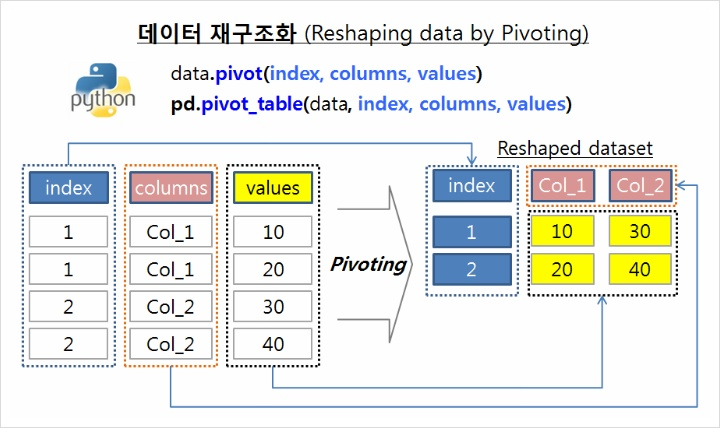

In [49]:
reordered_since_days_ds["reordered_rate"] = reordered_since_days_ds[1] / reordered_since_days_ds.sum(axis =1)
#reordered_since_days_ds[1]  : 1의 개수, 즉 재구매 개수
#각 행마다 재구매 비율 / 전체 개수를 해서 비율을 구한다
reordered_since_days_ds[[0,1]].sum().sum()
avg_reordered_rate = round(reordered_since_days_ds[1].sum() / reordered_since_days_ds[[0,1]].sum().sum(),2)
# 재구매 횟수 에서 재구매유,무 횟수 합을 나눈다, 결과에서 소수점 둘째자리에서 반올림한다
#이걸 표의 title에 넣어서 각 값과 비교 할 수 있도록 한다

In [50]:
reordered_since_days_ds.head()

reordered,0,1,reordered_rate
days_since_prior_order,,,
0.0,117219,331479,0.738757
1.0,359860,581256,0.617624
2.0,519388,945487,0.645439
3.0,622308,1255573,0.668612
4.0,670852,1409708,0.677562


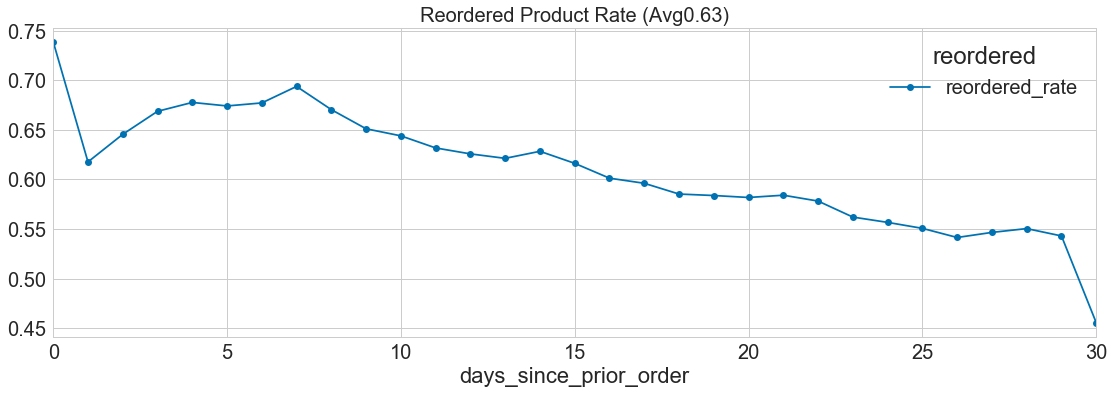

In [51]:
reordered_since_days_ds[['reordered_rate']].plot(kind='line', marker = 'o', figsize = (16,6) )
plt.title ("Reordered Product Rate (Avg{})".format(avg_reordered_rate), fontsize = 20)
plt.tight_layout() # adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

### A4. 다시 주문하는 기간이 짧을 수록 재구매 (reorder)상품 비율이 높다

* 평균대비 5%는 어디서 나왔을까?
* 15일 정도를 기준으로 그 전에 재주문시 재구매 하는 상품의 비율이 더 높은 것 같다.
* 상품예측의 feature로 할 정도의 특징점이 될까?

<br>
* 재구매 되는 상품은 신선식품의 종류가 아닐까?
* 공산품은 한달 이내에는 많이 살 필요가 없지 않을까?


### Q5. 주문 순번이 큰, 즉 많이 주문을 한 오더에는 재구매 상품이 많을까?


In [52]:
reordered_order_num_ds = merge_order_product_ds.groupby(['order_number', 'reordered']).agg({'product_id':len})
# 주문번호와 재구매 여부로 groupby -> 값은 제품 아이디의 개수

reordered_order_num_ds = reordered_order_num_ds.reset_index().pivot(index='order_number', columns = 'reordered', values = 'product_id') 
reordered_order_num_ds['reorder_rate'] = reordered_order_num_ds[1] / reordered_order_num_ds.sum(axis =1)
# 각 행마다 재구매 비율을 값으로 하는 새로운 column생성

avg_reordered_rate = round(reordered_order_num_ds[1].sum() / reordered_order_num_ds[[0,1]].sum().sum(), 2)
# 재구매한 총 합에서 전체 총합을 나눠서 비율을 구함
reordered_order_num_ds.fillna(0, inplace=True) # NA값을 0으로 채움
reordered_order_num_ds.head()

reordered,0,1,reorder_rate
order_number,,,
1,2078068.0,0.0,0.000000
2,1490447.0,557885.0,0.272361
3,1258570.0,792161.0,0.386282
4,985974.0,834324.0,0.458345
5,802165.0,826246.0,0.507394


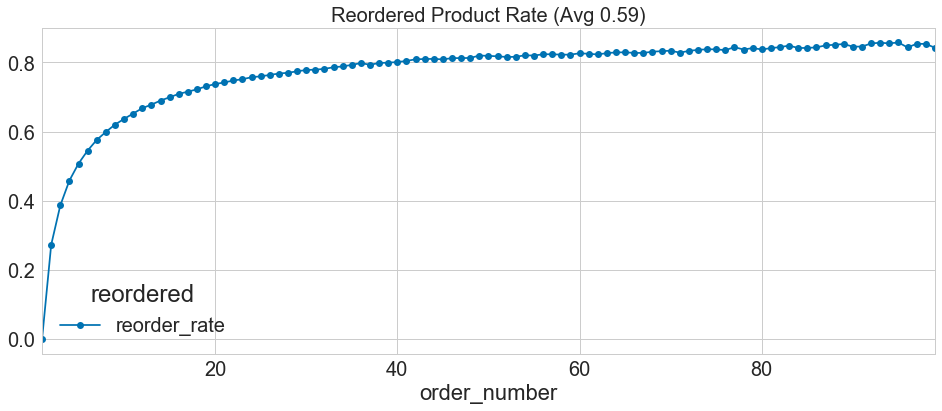

In [53]:
reordered_order_num_ds[["reorder_rate"]].plot(kind='line', marker='o', figsize=(16,6)) #값은 column값을 넣어야 한다

plt.title("Reordered Product Rate (Avg {})".format(avg_reordered_rate), fontsize = 20)
plt.show()

* 40번 이상 주문한 사람의 재구매 비율은 80% 이상
* 재구매 상품이 많기 때문에 주문수가 많다고 볼수 있지 않을까?
* 예측feature로 쓰기에 타당 해 보인다
* 명백한 로그 함수로 보인다

### Q6) 어떤 상품이 Reorder비율이 높을까?
<br>
* 1000개이상 주문된 상품 중에서 재구매 비율이 높은 20개 상품
* 1000개 이상은 상품이 2개정도 밖에 안 보인다. -> 300개 이상으로 함
* product와 - reorder의 비율을 봐야 할 듯

In [54]:
product_reorder_ds = merge_order_product_ds.groupby(['product_id']).\
agg({'order_id':len, 'reordered':lambda x: len(x[x>0]), 'user_id':lambda x: len(x.unique())})
# product_id로 그룹화 한다 -> 값은
# order_id: 프로덕트당 몇개의 주문이 되었는지
# reorder : 재구매된 개수만 센다
# user_id: 중복 제거하며 몇명이나 구매했는지
product_reorder_ds.tail()

,order_id,reordered,user_id
product_id,,,
49684,9,1,8
49685,49,6,43
49686,120,84,36
49687,13,6,7
49688,89,15,74


In [55]:
convert_colnames = {'user_id': 'unique_users', 'reordered':"reorder", 'order_id':'total_order'} 
#테이블의 변수이름을 바꾸기 위한 dict설정
product_reorder_ds.columns = [convert_colnames[col] for col in product_reorder_ds.columns]
# 변수 이름 바꿈

In [56]:
product_reorder_ds['reorder_rate'] = round (product_reorder_ds.reorder /product_reorder_ds.total_order, 2)
# 재구매된 수를 전체수로 나눔으로 재구매 비율 변수를 만들 수 있다
product_reorder_ds['orders_per_user'] = round(product_reorder_ds.total_order / product_reorder_ds.unique_users, 2)
#전체 주문개수를  구매자 수로 나눔
product_reorder_ds = product_reorder_ds.merge(products,left_index=True, right_on='product_id')
# product_id의 이름을 확인하기 위해서 작업한 데이터 셋과 products를 합한다
product_reorder_ds.tail()

,total_order,reorder,unique_users,reorder_rate,orders_per_user,product_id,product_name,aisle_id,department_id
49683,9,1,8,0.11,1.12,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49,6,43,0.12,1.14,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,120,84,36,0.70,3.33,49686,Artisan Baguette,112,3
49686,13,6,7,0.46,1.86,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,89,15,74,0.17,1.20,49688,Fresh Foaming Cleanser,73,11


In [57]:
product_reorder_ds[product_reorder_ds.total_order>300].sort_values('reorder_rate', ascending = False)\
[['product_name', 'total_order','reorder_rate', 'aisle_id', 'orders_per_user']][:50]
# 합계주문수가 1000개 이상인 것을 재구매 비율로 내림차순한다

,product_name,total_order,reorder_rate,aisle_id,orders_per_user
5513,Organic Homogenized Whole Milk,3970,0.86,84,7.03
47230,Ultra-Purified Water,1489,0.86,115,7.02
43393,Organic Lactose Free Whole Milk,8477,0.86,91,7.09
35495,Real2 Alkalized Water 500 ml,451,0.86,115,7.27
9291,Half And Half Ultra Pasteurized,2921,0.86,84,7.23
45503,Whole Organic Omega 3 Milk,9108,0.86,84,7.15
17468,Lo-Carb Energy Drink,467,0.86,64,6.97
29446,"Milk, Organic, Vitamin D",20198,0.85,84,6.87
38688,Organic Reduced Fat Milk,35663,0.85,84,6.70
10030,Homestyle Orange Juice,311,0.85,31,6.62


### A6. 우유, 바나나, 과일, 채소 등
* 300개 이상 주문한 재구매 상품에서 재구매 비율이 높은 상품은
* 우유, 바나나, 과일 채소 등 
* aisle_id는 24, 83, 123정도로 축약된다

### 추가로, aisle별 재구매 상품비율 상위 20, 하위 20은?

In [58]:
from collections import defaultdict
import operator

def popularWords(names, topn =2):
    wordFrequency = defaultdict(int)
    # 기본값을 정의하고 키값이 없더라도 에러를 출력하지 않고 기본값 출력
    
    def updateWords(words):
        for word in words:
            if len(word) > 1:
                wordFrequency[word] += 1# 상품을 단어 별로 잘라서 단어가 key가 되는건가?
                                        # 그래서 많이 들어오는 대표 단어의 수가 높아지는듯?
    names.apply(lambda x: updateWords(x.split()))
    #apply는 dataframe을 따라서 함수를 차례로 적용, 여기서는 split
    
    tops = sorted(wordFrequency.items(), key=operator.itemgetter(1), reverse = True)[:topn]
    # 현재 딕셔너리의 item들이 위에 카운트 되는 수여서 그걸 내림차순 하는듯..
    #itemgetter(1): 딕셔너리의 값을 가져온다
    return " ".join([n[0] for n in tops]) #list를 구분자 이용하여 문자열으로

In [59]:
aisle_ds = products.groupby('aisle_id').agg({'product_name': popularWords, 'product_id': lambda x:len(x.unique())})

aisle_ds.head(10)
#product_reorder_ds.head()

,product_name,product_id
aisle_id,,
1,Salad Soup,146
2,Cheese Goat,271
3,Bar Chocolate,832
4,Rice Cheese,543
5,Sauce Mix,409
6,Organic Condoms,548
7,Beef Pork,100
8,Chocolate Cake,297
9,Sauce Pasta,399


In [60]:
aisle_order_stat_ds = product_reorder_ds.groupby('aisle_id').agg({'total_order':sum, 'reorder':sum})
# 중분류로 그룹을 묶고, 총 주문개수, 재주문 개수
aisle_order_stat_ds['reorder_rate'] = round(aisle_order_stat_ds.reorder / aisle_order_stat_ds.total_order, 2)
#재구매수 / 총구매수 = 비율을 구한다- > 새로운 콜롬 생성
aisle_order_stat_ds.head()
aisle_order_stat_ds = aisle_order_stat_ds.merge(aisle_ds, left_index = True, right_index = True).\
sort_values('reorder_rate', ascending = False)  # aisle_ds를 합합 (이름을 알기 위해서) -> 재구매 비율로 내림차순

aisle_order_stat_ds.index = aisle_order_stat_ds.product_name + "(" +\
aisle_order_stat_ds.index.astype(str)+')'
# 모든 값을 str으로 바꿔서 ()안에 넣어 복사한다

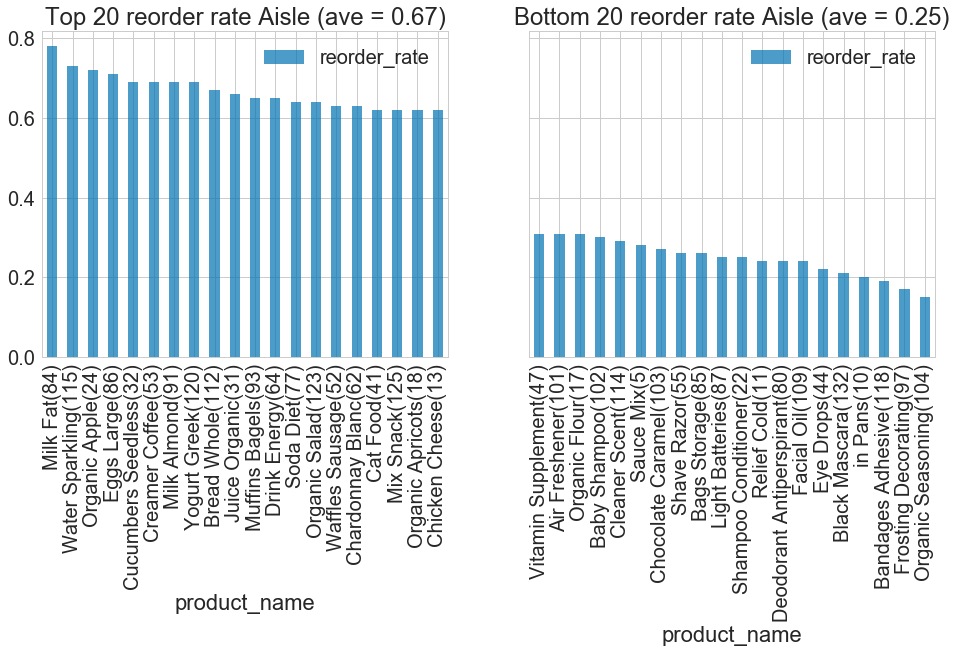

In [61]:
sns.set(style='whitegrid', palette = 'colorblind', font_scale = 2)

f, (ax1, ax2) = plt.subplots(1,2,sharey=True)


top20_ds = aisle_order_stat_ds[['reorder_rate']][:20] # 재구매비율 20위까지
top20_ds.plot(kind = 'bar', figsize = (16,6), alpha = 0.7, \
              title = 'Top 20 reorder rate Aisle (ave = {})'.format(round(top20_ds.reorder_rate.mean(),2)), ax=ax1) #제목에는 재구매 비율의 평균이 들어가도록

bottom20_ds = aisle_order_stat_ds[['reorder_rate']][-20:]

bottom20_ds.plot(kind = 'bar', figsize = (16,6), alpha = 0.7, title = 'Bottom 20 reorder rate Aisle (ave = {})'.
             format(round(bottom20_ds.reorder_rate.mean(),2)), ax = ax2) #제목에는 재구매 비율의 평균이 들어가도록


plt.show()

* 재구매 비율이 높은 구역 (aisle)은 유통기간이 짧은 우유, 물, 커피, 주스 등 신선 농산물 위주
* 재구매 비율이 높은 구역은 유통기간이 긴 제품이나 비식품으로 보인다
* 이처럼 재구매 비율의 분석의 유통기간(혹은 소비기간) 에 대비하여 높은지 낮은지에 따라 구매 성향을 더 알 수 있을 듯하다

### Q7) 주문이 많은 상품은 재구매율이 높다?



스피어만 상관계수<p>
스피어만 상관계수(Spearman correlation coefficient) 는 데이터가 서열척도인 경우 즉 자료의 값 대신 순위를 이용하는 경우의 상관계수로서,<p>
데이터를 작은 것부터 차례로 순위를 매겨 서열 순서로 바꾼 뒤 순위를 이용해 상관계수를 구한다. <p>
두 변수 간의 연관 관계가 있는지 없는지를 밝혀주며 자료에 이상점이 있거나 표본크기가 작을 때 유용하다. <p>
스피어만 상관계수는 -1과 1 사이의 값을 가지는데 두 변수 안의 순위가 완전히 일치하면 +1이고,<p>
두 변수의 순위가 완전히 반대이면 -1이 된다. <p>
예를 들어 수학 잘하는 학생이 영어를 잘하는 것과 상관있는지 없는지를 알아보는데 쓰일 수 있다.
<br>
* reorder_rate(0 ~ 1)과 total_order(1~ 500000)의 데이터 단위가 너무 차이가 나기 때문에 상관계수는 Spearnam으로 측정

In [62]:
product_reorder_ds.tail()

,total_order,reorder,unique_users,reorder_rate,orders_per_user,product_id,product_name,aisle_id,department_id
49683,9,1,8,0.11,1.12,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49,6,43,0.12,1.14,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,120,84,36,0.70,3.33,49686,Artisan Baguette,112,3
49686,13,6,7,0.46,1.86,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,89,15,74,0.17,1.20,49688,Fresh Foaming Cleanser,73,11


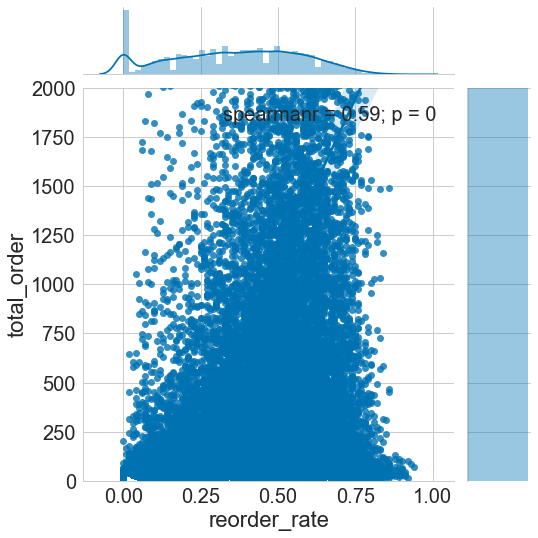

In [63]:
from scipy.stats import spearmanr
g = sns.jointplot("reorder_rate", 'total_order', kind='reg', marker='o', 
                ylim = (0, 2000), size = 8, stat_func = spearmanr, data = product_reorder_ds)

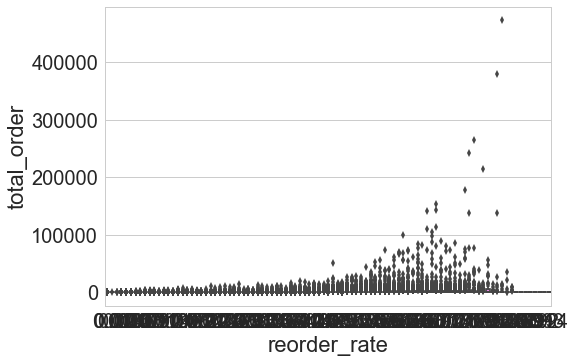

In [64]:
sns.boxplot(x='reorder_rate', y = 'total_order',data = product_reorder_ds)
plt.show()

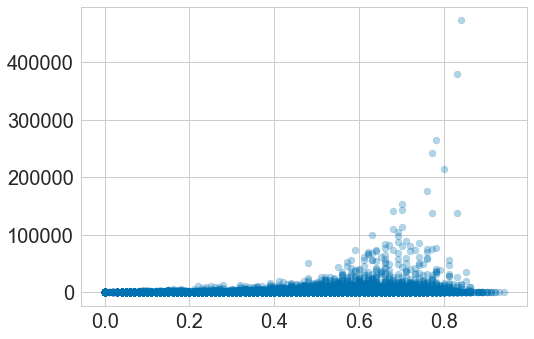

In [65]:
plt.scatter(product_reorder_ds.reorder_rate, product_reorder_ds.total_order, alpha=0.3)
plt.show()

### A7. 표본 추출로는 양의 상관관계가 약하게 나옴 0.13

* 하지만 재구매율이 증가할 수록 주문량도 증가하는 것을 알 수 있고
* 0.75정도 됐을 때 가장 높은 것을 볼 수 있다
<br><br>
* 반대로, 구매수는 많은데, 재구매비율이 낮은 상품은? 에 대한 의문이 남는다

<br><br><br><br><br><br>

# Preprocessing

In [66]:
def ka_add_groupby_features_n_vs_1(df, group_columns_list, target_columns_list, methods_list, keep_only_stats=True, verbose=1):

    grouped_name = ''.join(group_columns_list)
    target_name = ''.join(target_columns_list)
    combine_name = [[grouped_name] + [method_name] + [target_name] for method_name in methods_list]

    df_new = df.copy()
    grouped = df_new.groupby(group_columns_list)

    the_stats = grouped[target_name].agg(methods_list).reset_index()
    the_stats.columns = [grouped_name] + \
                        ['_%s_%s_by_%s' % (grouped_name, method_name, target_name) \
                         for (grouped_name, method_name, target_name) in combine_name]
    if keep_only_stats:
        return the_stats
    else:
        df_new = pd.merge(left=df_new, right=the_stats, on=group_columns_list, how='left')
    return df_new

In [67]:
def ka_add_groupby_features_1_vs_n(df, group_columns_list, agg_dict, only_new_feature=True):

    df_new = df.copy()
    grouped = df_new.groupby(group_columns_list)

    the_stats = grouped.agg(agg_dict)
    the_stats.columns = the_stats.columns.droplevel(0)
    the_stats.reset_index(inplace=True)
    
    if only_new_feature:
        df_new = the_stats
    else:
        df_new = pd.merge(left=df_new, right=the_stats, on=group_columns_list, how='left')
    return df_new

### Product

In [68]:
# prior의 정보를 orders에 merge
priors_orders_detail = orders.merge(right=priors, how='inner', on='order_id')

In [69]:
priors_orders_detail.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
32434484,2977660,206209,prior,13,1,12,7.0,14197,5,1
32434485,2977660,206209,prior,13,1,12,7.0,38730,6,0
32434486,2977660,206209,prior,13,1,12,7.0,31477,7,0
32434487,2977660,206209,prior,13,1,12,7.0,6567,8,0
32434488,2977660,206209,prior,13,1,12,7.0,22920,9,0


In [70]:
print(priors_orders_detail.shape)

(32434489, 10)


In [71]:
#새로운 변수 생성
priors_orders_detail.loc[:,'_user_buy_product_times'] = priors_orders_detail.groupby(['user_id', 'product_id']).cumcount() + 1
# user_id와 product_id를 묶어서 같은 값이 있으면 개수 +1으로 한다
#(시작값이 0부터 이기 때문에 1을 더해준다)
priors_orders_detail.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_user_buy_product_times
32434484,2977660,206209,prior,13,1,12,7.0,14197,5,1,2
32434485,2977660,206209,prior,13,1,12,7.0,38730,6,0,1
32434486,2977660,206209,prior,13,1,12,7.0,31477,7,0,1
32434487,2977660,206209,prior,13,1,12,7.0,6567,8,0,1
32434488,2977660,206209,prior,13,1,12,7.0,22920,9,0,1


In [72]:
agg_dict = {'user_id':{'_prod_tot_cnts':'count'}, 
            'reordered':{'_prod_reorder_tot_cnts':'sum'}, 
            '_user_buy_product_times': {'_prod_buy_first_time_total_cnt':lambda x: sum(x==1),
                                        '_prod_buy_second_time_total_cnt':lambda x: sum(x==2)}}

#새로운 feature생성
#1) _prod_tot_cnts : user_id로 그룹해서 개수(몇명이 이 제품을 샀는가)
#2)_prod_reorder_tot_cnts :이 제품이 몇번 재구매 됨?
#3) _prod_buy_first_time_total_cnt :이 제품이 첫번째 구매였던 적
#4) _prod_buy_second_time_total_cnt:이 제품이 두번째 구매였던 적

In [73]:
prd = ka_add_groupby_features_1_vs_n(priors_orders_detail, ['product_id'], agg_dict)
#위의 새로운 변수를 넘긴다

c:\Python36\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [74]:
prd.tail()

,product_id,_prod_tot_cnts,_prod_reorder_tot_cnts,_prod_buy_first_time_total_cnt,_prod_buy_second_time_total_cnt
49672,49684,9,1,8,1
49673,49685,49,6,43,6
49674,49686,120,84,36,16
49675,49687,13,6,7,4
49676,49688,89,15,74,11


In [75]:
print (prd.shape)

(49677, 5)


In [76]:
prd['_prod_reorder_prob'] = prd._prod_buy_second_time_total_cnt /prd._prod_buy_first_time_total_cnt
#  (두번째 구매횟수 / 첫번째 구매횟수)

In [77]:
prd['_prod_reorder_ratio'] = prd._prod_reorder_tot_cnts / prd._prod_tot_cnts
# 재구매된 횟수  / 총 구매된 횟수 = 재구매 비율

In [78]:
prd['_prod_reorder_times'] = 1 + prd._prod_reorder_tot_cnts / prd._prod_buy_first_time_total_cnt
# 총 재구매 된 횟수

In [79]:
prd.tail(10)

,product_id,_prod_tot_cnts,_prod_reorder_tot_cnts,_prod_buy_first_time_total_cnt,_prod_buy_second_time_total_cnt,_prod_reorder_prob,_prod_reorder_ratio,_prod_reorder_times
49667,49679,132,40,92,19,0.206522,0.303030,1.434783
49668,49680,1018,300,718,146,0.203343,0.294695,1.417827
49669,49681,70,39,31,15,0.483871,0.557143,2.258065
49670,49682,108,38,70,17,0.242857,0.351852,1.542857
49671,49683,97315,67313,30002,17002,0.566696,0.691702,3.243617
49672,49684,9,1,8,1,0.125000,0.111111,1.125000
49673,49685,49,6,43,6,0.139535,0.122449,1.139535
49674,49686,120,84,36,16,0.444444,0.700000,3.333333
49675,49687,13,6,7,4,0.571429,0.461538,1.857143
49676,49688,89,15,74,11,0.148649,0.168539,1.202703


In [80]:
print(prd.shape)

(49677, 8)


### User

In [81]:
agg_dict_2 = {'order_number':{'_user_total_orders':'max'},
              'days_since_prior_order':{'_user_sum_days_since_prior_order':'sum', 
                                        '_user_mean_days_since_prior_order': 'mean'}}

#User_id로 group했을때
#1) _user_total_orders : 이용자가 한 주문 총 횟수
#2)_user_sum_days_since_prior_order: 이전주문으로의 경과기간의 합계
#3) _user_mean_days_since_prior_order: 경과기간의 합계

In [82]:
users = ka_add_groupby_features_1_vs_n(orders[orders.eval_set == 'prior'], ['user_id'], agg_dict_2)

c:\Python36\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [83]:
users.tail()

,user_id,_user_total_orders,_user_sum_days_since_prior_order,_user_mean_days_since_prior_order
206204,206205,3,40.0,20.000000
206205,206206,67,249.0,3.772727
206206,206207,16,215.0,14.333333
206207,206208,49,357.0,7.437500
206208,206209,13,210.0,17.500000


In [84]:
print(users.shape)

(206209, 4)


In [85]:
agg_dict_3 = {'reordered':
              {'_user_reorder_ratio': 
               lambda x: sum(priors_orders_detail.loc[x.index,'reordered']==1)/
                         sum(priors_orders_detail.loc[x.index,'order_number'] > 1)},
              'product_id':{'_user_total_products':'count', 
                            '_user_distinct_products': lambda x: x.nunique()}}

#user_id로 묶었을 때
#1) _user_reorder_ratio : 사용자의 재구매 비율
#2) _user_total_products: 사용자가 총 몇개의 제품을 샀는지
#3) _user_distinct_products: 사용자가 총 몇종류의 제품을 샀는지

In [86]:
us = ka_add_groupby_features_1_vs_n(priors_orders_detail, ['user_id'], agg_dict_3)

c:\Python36\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [87]:
us.tail()

,user_id,_user_reorder_ratio,_user_total_products,_user_distinct_products
206204,206205,0.533333,32,24
206205,206206,0.480427,285,150
206206,206207,0.658291,223,92
206207,206208,0.720301,677,198
206208,206209,0.525862,129,68


In [88]:
print(us.shape)

(206209, 4)


In [89]:
users = users.merge(us, how='inner')

In [90]:
users.tail()

,user_id,_user_total_orders,_user_sum_days_since_prior_order,_user_mean_days_since_prior_order,_user_reorder_ratio,_user_total_products,_user_distinct_products
206204,206205,3,40.0,20.000000,0.533333,32,24
206205,206206,67,249.0,3.772727,0.480427,285,150
206206,206207,16,215.0,14.333333,0.658291,223,92
206207,206208,49,357.0,7.437500,0.720301,677,198
206208,206209,13,210.0,17.500000,0.525862,129,68


In [91]:
print (users.shape)

(206209, 7)


In [92]:
users['_user_average_basket'] = users._user_total_products / users._user_total_orders
#사용자가 구매한 제품의 총 합 /사용자의 주문 총 횟수  = 장바구니의 제품개수 평균

In [93]:
#샘플림 안한걸로 하려면 orders로 해야함

us = orders[orders.eval_set != "prior"][['user_id', 'order_id', 'eval_set', 'days_since_prior_order']]
#prior가 아니면 column를 빼서 us에 넣는다 , 즉 train과 test를 따로 빼 낸다

In [94]:
us.rename(index=str, columns={'days_since_prior_order': 'time_since_last_order'}, inplace=True)
#coulumn이름 변경

In [95]:
us.tail()

,user_id,order_id,eval_set,time_since_last_order
3420933,206205,1716008,train,10.0
3421001,206206,1043943,test,0.0
3421018,206207,2821651,test,14.0
3421068,206208,803273,test,4.0
3421082,206209,272231,train,30.0


In [96]:
print (us.shape)

(206209, 4)


In [97]:
users = users.merge(us, how='inner')

In [98]:
users.tail()

,user_id,_user_total_orders,_user_sum_days_since_prior_order,_user_mean_days_since_prior_order,_user_reorder_ratio,_user_total_products,_user_distinct_products,_user_average_basket,order_id,eval_set,time_since_last_order
206204,206205,3,40.0,20.000000,0.533333,32,24,10.666667,1716008,train,10.0
206205,206206,67,249.0,3.772727,0.480427,285,150,4.253731,1043943,test,0.0
206206,206207,16,215.0,14.333333,0.658291,223,92,13.937500,2821651,test,14.0
206207,206208,49,357.0,7.437500,0.720301,677,198,13.816327,803273,test,4.0
206208,206209,13,210.0,17.500000,0.525862,129,68,9.923077,272231,train,30.0


In [99]:
print (users.shape)

(206209, 11)


### 전체

In [100]:
agg_dict_4 = {'order_number':{'_up_order_count': 'count', 
                              '_up_first_order_number': 'min', 
                              '_up_last_order_number':'max'}, 
              'add_to_cart_order':{'_up_average_cart_position': 'mean'}}

#priors_orders_detail를 user_id와 product_id로 묶는다
#1) _up_order_count: user_id와 product_id의 중복이 없는 이상 1일듯
#2) _up_first_order_number : 구매 번호의 최소값 (최초로 이 물건을 산 구매번호)
#3)_up_last_order_number:구매 번호의 최대값(최후로 이 물건을 산 구매번호)

In [101]:
data = ka_add_groupby_features_1_vs_n(df=priors_orders_detail, 
                                                      group_columns_list=['user_id', 'product_id'], 
                                                      agg_dict=agg_dict_4)

c:\Python36\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [102]:
data.tail()

,user_id,product_id,_up_order_count,_up_first_order_number,_up_last_order_number,_up_average_cart_position
13307948,206209,43961,3,4,12,8.0
13307949,206209,44325,1,7,7,8.0
13307950,206209,48370,1,11,11,8.0
13307951,206209,48697,1,7,7,6.0
13307952,206209,48742,2,7,12,9.0


In [103]:
print (data.shape)

(13307953, 6)


In [104]:
data = data.merge(prd, how='inner', on='product_id').merge(users, how='inner', on='user_id')

In [105]:
data.tail()

,user_id,product_id,_up_order_count,_up_first_order_number,_up_last_order_number,_up_average_cart_position,_prod_tot_cnts,_prod_reorder_tot_cnts,_prod_buy_first_time_total_cnt,_prod_buy_second_time_total_cnt,...,_user_total_orders,_user_sum_days_since_prior_order,_user_mean_days_since_prior_order,_user_reorder_ratio,_user_total_products,_user_distinct_products,_user_average_basket,order_id,eval_set,time_since_last_order
13307948,120516,8566,5,1,5,1.0,140,86,54,27,...,7,100.0,16.666667,0.833333,7,2,1.0,3264957,train,14.0
13307949,120516,40072,2,6,7,1.0,25,10,15,7,...,7,100.0,16.666667,0.833333,7,2,1.0,3264957,train,14.0
13307950,166751,49001,3,1,3,1.0,45,14,31,6,...,3,20.0,10.000000,1.000000,3,1,1.0,2080697,train,14.0
13307951,106143,19675,26,1,26,1.0,39,33,6,5,...,26,191.0,7.640000,1.000000,26,1,1.0,1714200,test,9.0
13307952,66343,47210,4,1,4,1.0,11,4,7,2,...,4,79.0,26.333333,1.000000,4,1,1.0,2913671,test,30.0


In [106]:
print(data.shape)

(13307953, 23)


In [107]:
data['_up_order_rate'] = data._up_order_count / data._user_total_orders
#1(왠만하면?) / 이용자가 한 총 주문횟수

In [108]:
data['_up_order_since_last_order'] = data._user_total_orders - data._up_last_order_number
#총 주문 번호의 합 - 마지막 주문번호

In [109]:
data['_up_order_rate_since_first_order'] = data._up_order_count / (data._user_total_orders - data._up_first_order_number + 1)

In [110]:
# add user_id to train set
train = train.merge(right=orders[['order_id', 'user_id']], how='left', on='order_id')
data = data.merge(train[['user_id', 'product_id', 'reordered']], on=['user_id', 'product_id'], how='left')

In [111]:
data.head()

,user_id,product_id,_up_order_count,_up_first_order_number,_up_last_order_number,_up_average_cart_position,_prod_tot_cnts,_prod_reorder_tot_cnts,_prod_buy_first_time_total_cnt,_prod_buy_second_time_total_cnt,...,_user_total_products,_user_distinct_products,_user_average_basket,order_id,eval_set,time_since_last_order,_up_order_rate,_up_order_since_last_order,_up_order_rate_since_first_order,reordered
0,1,196,10,1,10,1.400000,35791,27791,8000,4660,...,59,18,5.9,1187899,train,14.0,1.0,0,1.000000,1.0
1,1,10258,9,2,10,3.333333,1946,1389,557,308,...,59,18,5.9,1187899,train,14.0,0.9,0,1.000000,1.0
2,1,10326,1,5,5,5.000000,5526,3603,1923,1003,...,59,18,5.9,1187899,train,14.0,0.1,5,0.166667,NaN
3,1,12427,10,1,10,3.300000,6476,4797,1679,889,...,59,18,5.9,1187899,train,14.0,1.0,0,1.000000,NaN
4,1,13032,3,2,10,6.333333,3751,2465,1286,617,...,59,18,5.9,1187899,train,14.0,0.3,0,0.333333,1.0


<br><br><br><br>

# Release memory

In [112]:
import gc
del priors_orders_detail, prd, users, us, orders, priors, products, order_product_cnt_ds, order_ds
gc.collect()

978

<br><br>

# Train, test 생성

In [113]:
train = data.loc[data.eval_set == "train",:]
train.drop(['eval_set', 'user_id', 'product_id', 'order_id'], axis=1, inplace=True)
train.loc[:, 'reordered'] = train.reordered.fillna(0)
X_test = data.loc[data.eval_set == "test",:]
#test 데이터 분리

c:\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\Python36\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<br><br>

# Pickle로 내보낸 train, test 로딩
 * 작업의 편의성을 위해 train과 test 객체를 pickle로 내보낸 이후 다시 load하는 과정
 * 내보내는 과정은 생략

In [1]:
import pickle

In [2]:
with open('train_sawatikap','rb') as myloaddata:
    train = pickle.load(myloaddata)
# 'eval_set', 'user_id', 'product_id', 'order_id' 컬럼이 미리 drop 되어 있음

In [3]:
with open('X_test_sawatikap','rb') as myloaddata2:
    X_test = pickle.load(myloaddata2)

<br><br>

# 컴퓨팅 파워 부족으로 데이터 Split

In [4]:
X_train1 = train[:2110000] # train data set

In [5]:
y_train1 = X_train1['reordered']

In [6]:
X_train2 = train[2110000:4220000] # validation data set

In [7]:
y_train2 = X_train2['reordered']

In [8]:
X_test = X_test[:2000000] # test data set

In [9]:
X_train1.drop(['reordered'], axis=1, inplace=True)

c:\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
X_train2.drop(['reordered'], axis=1, inplace=True)

c:\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
X_train1.shape

(2110000, 22)

In [12]:
X_test.drop(['user_id', 'product_id', 'reordered' , 'eval_set', 'order_id'], axis=1, inplace=True)

In [13]:
X_test.shape

(2000000, 22)

<br><br><br>

# PCA

In [14]:
from sklearn.decomposition import PCA
import pandas as pd

In [15]:
pca = PCA(5)

In [16]:
pca1 = pca.fit_transform(X_train1)
pcaV = pca.fit_transform(X_train2) # validation
pcaT = pca.fit_transform(X_test)

In [17]:
df_pca1 = pd.DataFrame(pca1)

In [18]:
df_pcaV = pd.DataFrame(pcaV) # validation

In [19]:
df_pcaT = pd.DataFrame(pcaT)

In [20]:
X_train1.reset_index(inplace=True)
X_train2.reset_index(inplace=True) # validation
X_test.reset_index(inplace=True)

In [21]:
concat_df = pd.concat([X_train1, df_pca1], axis=1, join_axes=[X_train1.index])
concat_df2 = pd.concat([X_train2, df_pcaV], axis=1, join_axes=[X_train2.index])
concat_test = pd.concat([X_test, df_pcaT], axis =1, join_axes=[X_test.index])

In [22]:
concat_df.set_index('index', inplace=True)
concat_df2.set_index('index', inplace=True)
concat_test.set_index('index', inplace=True)

X_train1.set_index('index', inplace=True)
X_train2.set_index('index', inplace=True)
X_test.set_index('index', inplace=True)

<br><br><br><br>

# RandomForest & PCA

In [23]:
from sklearn.ensemble import RandomForestClassifier
import numpy as nd

<br><br>

* RandomForest without PCA

In [24]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train1, y_train1)

In [25]:
y_pred = clf.predict(X_train2) # validations data set으로 예측

In [26]:
pred_random=[]
THRESHOLD = 0.22
for val in y_pred:
    if val > THRESHOLD:
        pred_random.append(1)
    else:
        pred_random.append(0)

y_val_append = pred_random

In [27]:
from sklearn.metrics import f1_score

In [28]:
f1_score(y_train2,y_val_append)

0.27862009917591235

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train2,y_val_append)

0.91374928909952602

<br>

* RandomForest with PCA

In [32]:
clf2 = RandomForestClassifier(n_estimators=100)
clf2 = clf2.fit(concat_df, y_train1) # train data set with PCA 로 train

In [33]:
y_pred = clf2.predict(concat_df2) # validations data set with PCA으로 예측

In [34]:
pred_random=[]
THRESHOLD = 0.22
for val in y_pred:
    if val > THRESHOLD:
        pred_random.append(1)
    else:
        pred_random.append(0)

y_val_append = pred_random

In [35]:
from sklearn.metrics import f1_score

In [36]:
f1_score(y_train2,y_val_append)

0.27709963070325222

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_train2,y_val_append)

0.91372132701421804

# Kaggle에 최종 제출한 결과

* RandomForest with PCA 결과 PCA를 추가한 것은 예측에 도움이 되지 않아 PCA 없는 모델로 Kaggle 제출

![random_forest_kaggle_score.JPG](random_forest_kaggle_score.JPG)

Get reference from : https://gist.github.com/goodvc78/3653c8f6a510f619d7ad6570111f38d8